### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"E:\Dataset\Dataset\autism_screening_data.csv", na_values=["?"])
df

,age,gender,ethnicity,jundice,autism,relation,contry_of_res,used_app_before,age_desc,A1_Score,...,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,Class
0,6.0,m,Others,no,no,Parent,Jordan,no,'4-11 years',1,...,0,0,1,1,0,1,0,0,5,NO
1,6.0,m,'Middle Eastern ',no,no,Parent,Jordan,no,'4-11 years',1,...,0,0,1,1,0,1,0,0,5,NO
2,6.0,m,NaN,no,no,NaN,Jordan,yes,'4-11 years',1,...,0,0,0,1,1,1,0,0,5,NO
3,5.0,f,NaN,yes,no,NaN,Jordan,no,'4-11 years',0,...,0,0,1,1,0,0,0,1,4,NO
4,5.0,m,Others,yes,no,Parent,'United States',no,'4-11 years',1,...,1,1,1,1,1,1,1,1,10,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,25.0,f,White-European,no,no,Self,Russia,no,'18 and more',0,...,0,1,1,0,1,1,1,1,7,YES
1096,34.0,m,Hispanic,no,no,Parent,Mexico,no,'18 and more',1,...,0,0,0,0,0,1,0,1,3,NO
1097,24.0,f,NaN,no,no,NaN,Russia,no,'18 and more',1,...,1,1,1,0,1,1,0,1,7,YES
1098,35.0,m,'South Asian',no,no,Self,Pakistan,no,'18 and more',1,...,0,1,1,0,1,0,1,1,6,NO


In [3]:
print(f"The shape of the df: {df.shape}")
print(f"No. of predictors : {df.shape[1]-1}")
print(f"Type of Target/Response varibale : dichotomos")

The shape of the df: (1100, 21)
No. of predictors : 20
Type of Target/Response varibale : dichotomos


In [4]:
# Handling The Missing Values
df.isnull().sum()

age                  6
gender               0
ethnicity          144
jundice              0
autism               0
relation           144
contry_of_res        0
used_app_before      0
age_desc             0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
result               0
Class                0
dtype: int64


> All other features except age and country_of_res have sufficiently low cardinality to one-hot encode them.


In [5]:
#Drop Unwanted Columns 
df = df.drop(['age_desc', 'used_app_before', 'relation', 'result'], axis=1)

In [6]:
#Rename the columns
df.rename(columns = {'jundice':'jaundice', 'contry_of_res':'country_of_res'}, inplace = True)

In [7]:
#Displaying Concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1094 non-null   float64
 1   gender          1100 non-null   object 
 2   ethnicity       956 non-null    object 
 3   jaundice        1100 non-null   object 
 4   autism          1100 non-null   object 
 5   country_of_res  1100 non-null   object 
 6   A1_Score        1100 non-null   int64  
 7   A2_Score        1100 non-null   int64  
 8   A3_Score        1100 non-null   int64  
 9   A4_Score        1100 non-null   int64  
 10  A5_Score        1100 non-null   int64  
 11  A6_Score        1100 non-null   int64  
 12  A7_Score        1100 non-null   int64  
 13  A8_Score        1100 non-null   int64  
 14  A9_Score        1100 non-null   int64  
 15  A10_Score       1100 non-null   int64  
 16  Class           1100 non-null   object 
dtypes: float64(1), int64(10), object(

In [8]:
#Total number of records
n_records = len(df.index)

#Number of records where individuals with ASD
n_asd_yes = len(df[df["Class"] == "YES"])

#Number of records where individuals who don't have ASD
n_asd_no = len(df[df["Class"] == "NO"])

#Percentage of individuals who are with ASD
yes_percent = (n_asd_yes/n_records)*100

# Print the results
print ("Total number of records:", n_records)
print ("Individuals diagonised with ASD:", n_asd_yes)
print ("Individuals not diagonised with ASD:", n_asd_no)
print ("Percentage of individuals diagonised with ASD:", yes_percent)

Total number of records: 1100
Individuals diagonised with ASD: 393
Individuals not diagonised with ASD: 707
Percentage of individuals diagonised with ASD: 35.72727272727273


NO     707
YES    393
Name: Class, dtype: int64



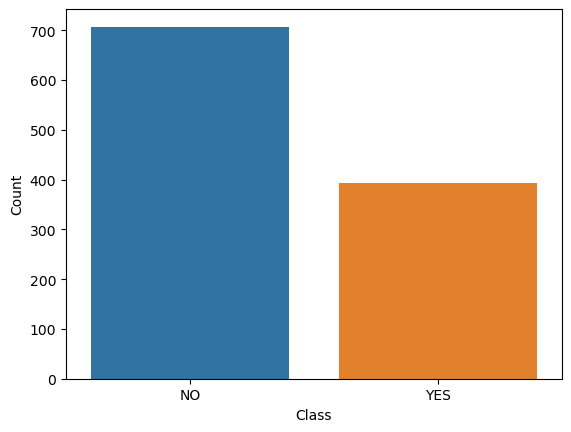

In [9]:
# countplot for person suffering and not suffering from ASD
print(df["Class"].value_counts())
print()
sns.countplot(x = df["Class"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

<Axes: >

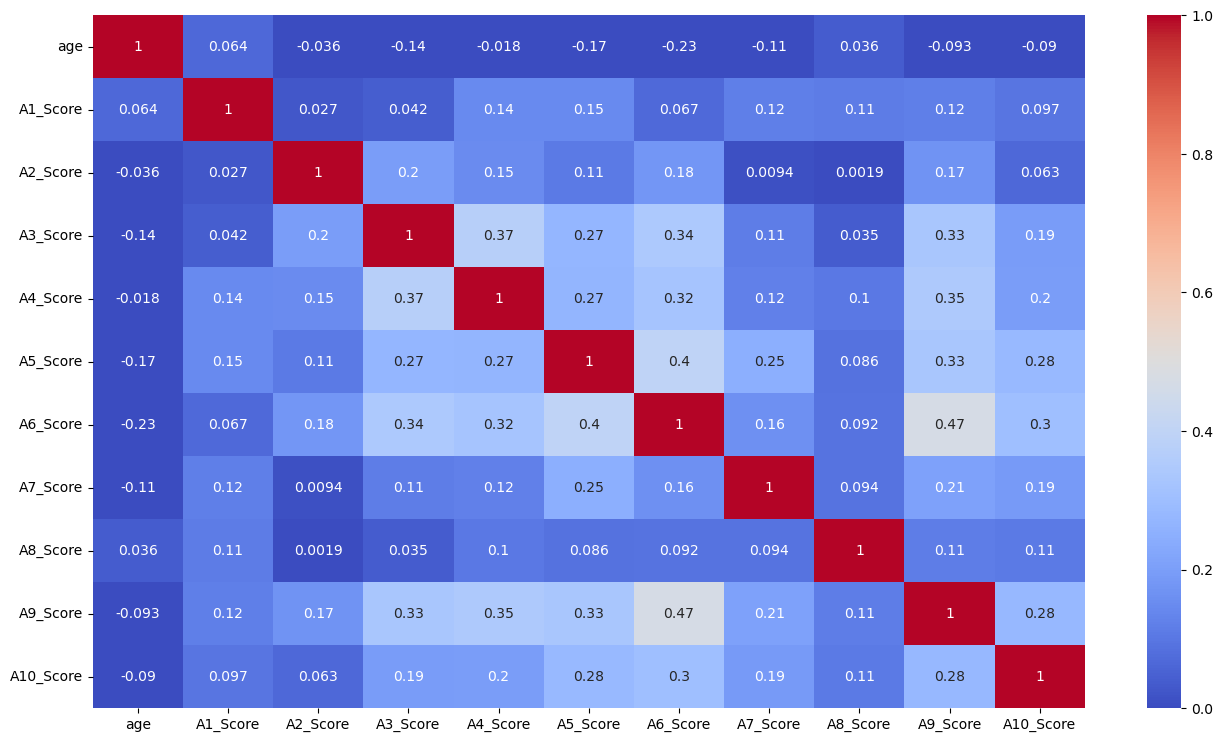

In [10]:
#Plotting Corrplot of the columns in dataset
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", vmin = 0, vmax = 1)

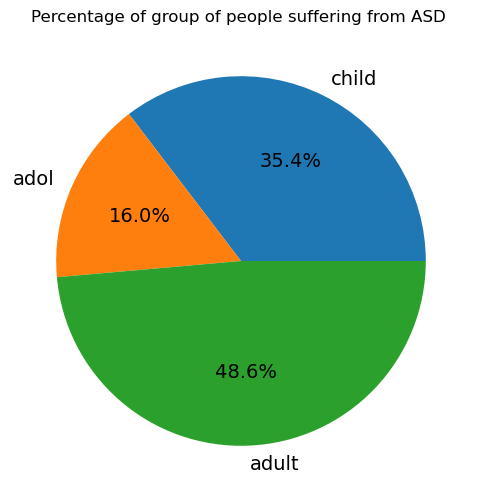

In [11]:
#Plotting pie chart of people suffering from autism spectrum of different age group
child = []
adol = []
adult = []

age = df.iloc[:, 0].tolist()
asd = df.iloc[:, -1].tolist()

for i in range(len(age)):
    if asd[i] == "YES":
        if age[i] <= 11:
            child.append(age[i])
        elif age[i] > 11 and age[i] <=16:
            adol.append(age[i])
        else:
            adult.append(age[i])
y = np.array([len(child), len(adol), len(adult)])

plt.figure(figsize = (20,6))
plt.pie(y, labels = ["child", "adol", "adult"], autopct = "%1.1f%%", textprops = {"fontsize" : 14})
plt.title("Percentage of group of people suffering from ASD ")
plt.show()

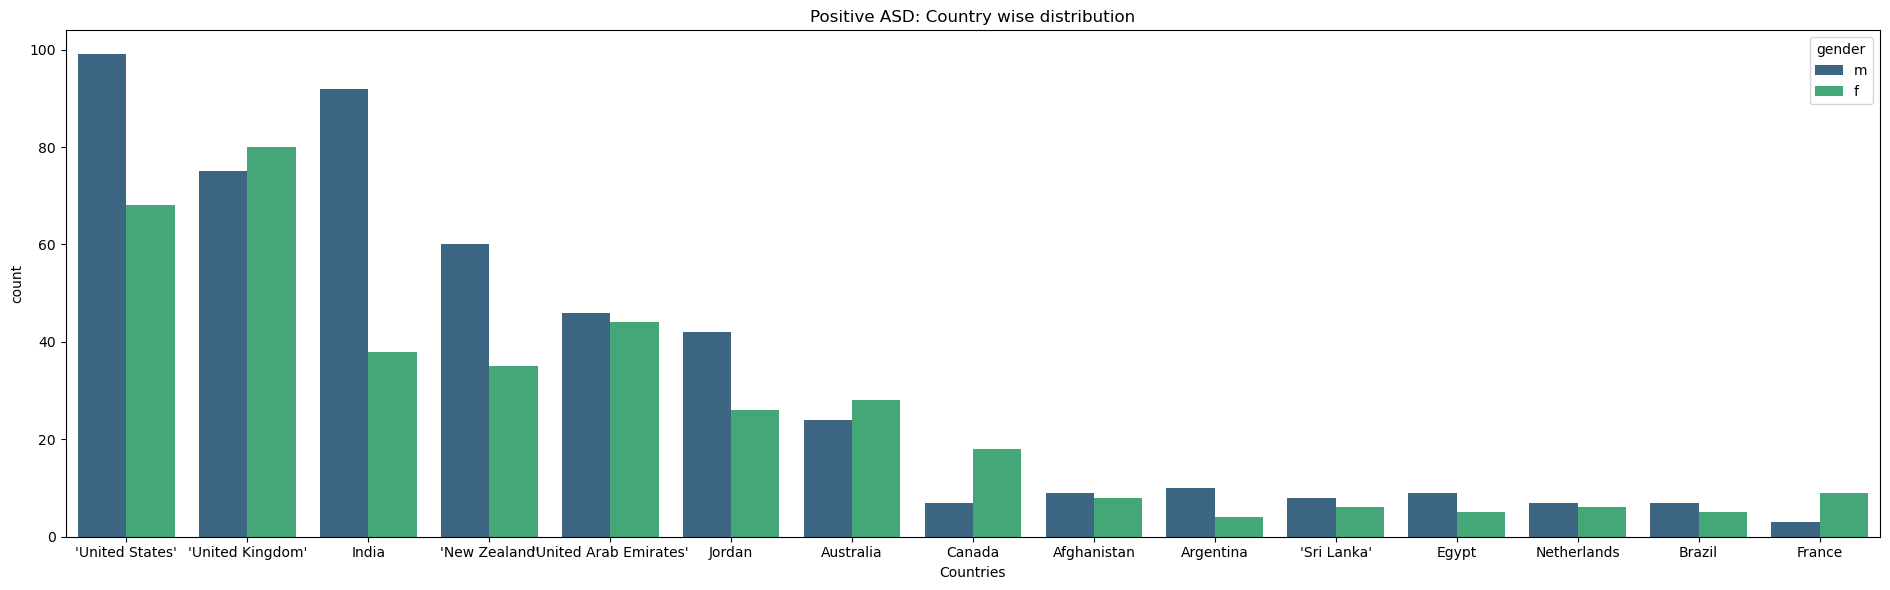

In [12]:
#Visualize positive ASD positive Adults based on top 15 countries
plt.figure(figsize=(19,6))
sns.countplot(x=df["country_of_res"], order= df['country_of_res'].value_counts().index[:15],hue=df['gender'],palette='viridis')
plt.title('Positive ASD: Country wise distribution')
plt.xlabel('Countries')
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Others'),
  Text(1, 0, "'Middle Eastern '"),
  Text(2, 0, 'White-European'),
  Text(3, 0, "Middle Eastern '"),
  Text(4, 0, 'Black'),
  Text(5, 0, "'South Asian'"),
  Text(6, 0, 'Asian'),
  Text(7, 0, 'Pasifika'),
  Text(8, 0, 'Hispanic'),
  Text(9, 0, 'Turkish'),
  Text(10, 0, 'Latino'),
  Text(11, 0, 'others')])

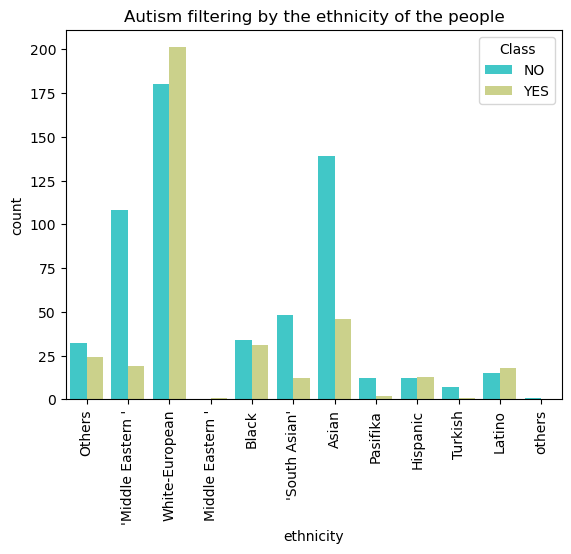

In [13]:
#Ethninicity of The people and ASD
sns.countplot(x = df["ethnicity"], hue = df["Class"], palette = 'rainbow')
plt.title("Autism filtering by the ethnicity of the people")
plt.xticks(rotation = 90)

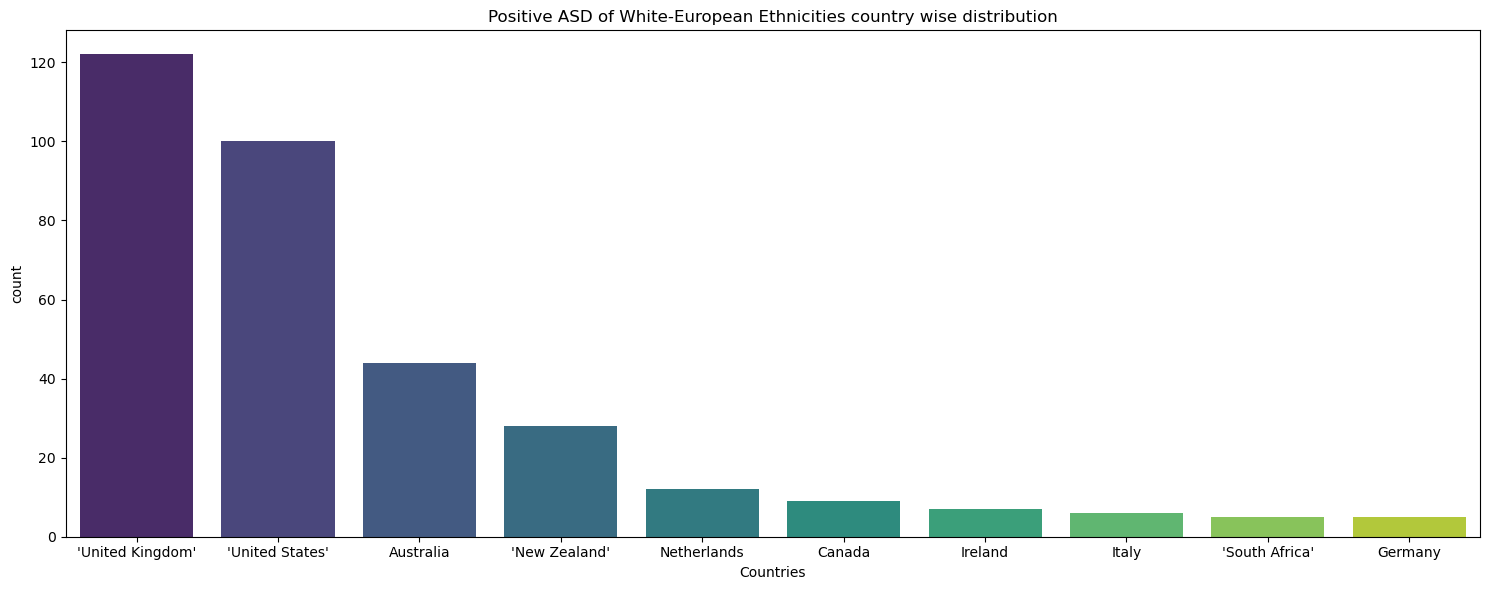

In [14]:
#Positive ASD of White-European(MAX) Ethnicities country wise distribution
plt.figure(figsize=(15,6))
sns.countplot(x='country_of_res',data = df[df['ethnicity']=='White-European'],
              order = df[df['ethnicity']=='White-European']['country_of_res'].value_counts().index[:10],palette='viridis')
plt.title('Positive ASD of White-European Ethnicities country wise distribution')
plt.xlabel('Countries')
plt.tight_layout()

<Axes: xlabel='Class', ylabel='count'>

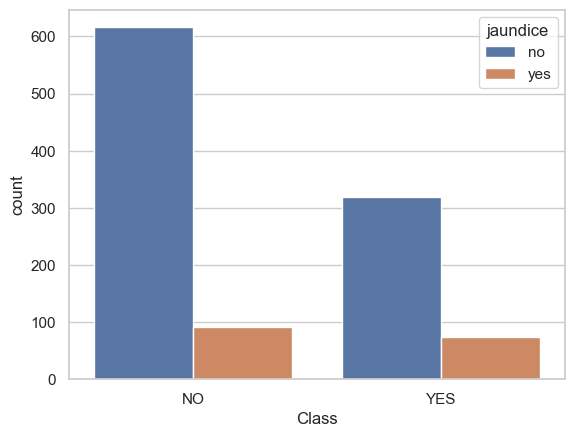

In [15]:
#Countplot of ASD positive born with Jaundice based on gender 
sns.set_theme(style="whitegrid")
sns.countplot(x = df["Class"], hue = "jaundice", data = df)

Text(0.5, 1.0, 'Age distribution of ASD positive')

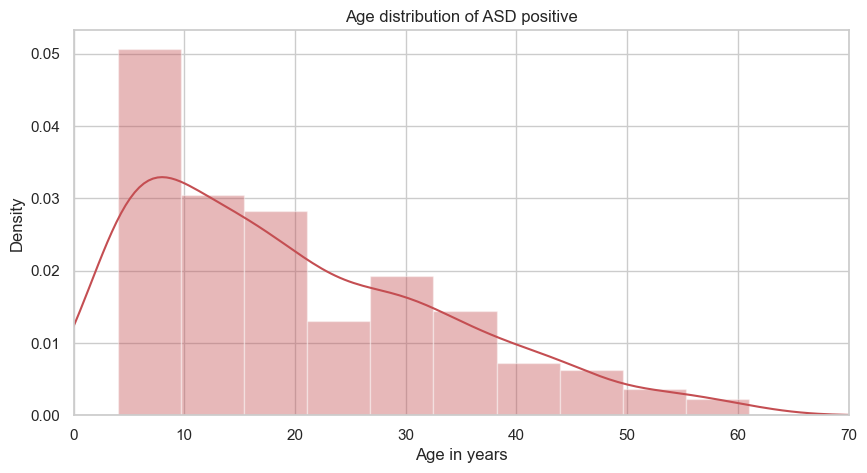

In [16]:
#Age distribution of ASD positive
data1 = df[df['Class'] == 'YES']
plt.figure(figsize = (10,5))
sns.distplot(data1['age'], kde = True, color = 'r')
plt.xlim(0,70)
plt.xlabel('Age in years')
plt.title('Age distribution of ASD positive')

### Data Preprocessing 


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df.dropna(inplace = True)

In [22]:
X = pd.get_dummies(df.iloc[:,:-1], columns = ['ethnicity', 'autism', 'gender', 'jaundice', 'country_of_res'])
X = X.values
X

array([[ 6.,  1.,  1., ...,  0.,  0.,  0.],
       [ 6.,  1.,  1., ...,  0.,  0.,  0.],
       [ 5.,  1.,  1., ...,  0.,  0.,  0.],
       ...,
       [34.,  1.,  0., ...,  0.,  0.,  0.],
       [35.,  1.,  0., ...,  0.,  0.,  0.],
       [26.,  1.,  0., ...,  0.,  0.,  0.]])

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Class_labels"] = le.fit_transform(df["Class"])

In [29]:
y = df["Class_labels"].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [31]:
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")


Shape of X_train : (668, 112)
Shape of X_test : (287, 112)
Shape of y_train : (668,)
Shape of y_test : (287,)


### Model Implemetation

In [34]:
### Importing Model related modules
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix


### Logistic Regression

In [99]:
#Making LogisticRegression Model
classifier = LogisticRegression(random_state=0)
start = time.time()
classifier.fit(X_train,y_train)
stop = time.time()
log_time = f"{stop - start}"

In [100]:
#Making predictions on test data
y_pred_log = classifier.predict(X_test)

#Displaying the predictions
y_pred_log

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0])

In [101]:
#AUC Score
auc_score_classifier = roc_auc_score(y_test, classifier.predict(X_test))
fpr_classifier, tpr_classifier, thresholds_classifier = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_classifier)

AUC Score: 0.9925493250259605


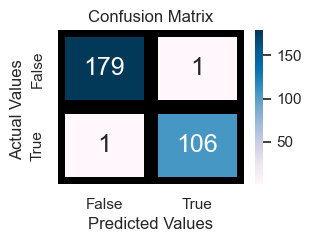

In [103]:
plt.figure(figsize = (3,2))
#Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)

#Plotting the confusion matrix
ax = sns.heatmap(cm_log, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=10, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [104]:
#Evaluation Strategy
TP_log = cm_log[1, 1]
TN_log = cm_log[0, 0]
FP_log = cm_log[0, 1]
FN_log = cm_log[1, 0]

# 1.  Sensitivity
sensitivity_log = TP_log / float(TP_log + FN_log)
print("Sensitivity:",sensitivity_log)

# 2.  Specificity
specificity_log = TN_log / float(TN_log + FP_log)
print("Specificity:",specificity_log)

# 3.  Precision
precision_log = TP_log / float(TP_log + FP_log)
print("Precision:",precision_log)

# 4.  Accuracy
accuracy_log = (TP_log + TN_log) / float(TP_log + TN_log + FN_log + FP_log)
print("Accuracy:",accuracy_log)

Sensitivity: 0.9906542056074766
Specificity: 0.9944444444444445
Precision: 0.9906542056074766
Accuracy: 0.9930313588850174


### K-Nearest-Neighbors

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
start = time.time()
knn.fit(X_train,y_train)
stop = time.time()
knn_time = f"{start- stop}"

In [36]:
#Making predictions on test data
y_pred_knn = knn.predict(X_test)

#Displaying the predictions
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [40]:
# AUC Score
auc_score_knn = roc_auc_score(y_test, knn.predict(X_test))


In [51]:
fpr_knn , tpr_knn, thresholds_knn = roc_curve(y_test,knn.predict_proba(X_test)[:, 1])
print("AUC : ", auc_score_knn)

AUC :  0.8232087227414331


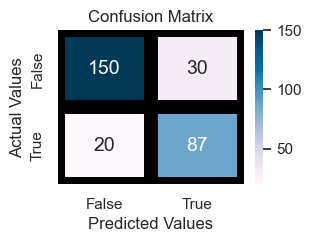

In [79]:
#Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

#Plooting The confusion matrix
plt.figure(figsize = (3,2))
ax = sns.heatmap(cm_knn, annot = True, annot_kws = {"fontsize" : 14}, cmap = "PuBu", fmt = ".3g", linewidths = 10, linecolor = "Black" )
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["False", "True"])
ax.yaxis.set_ticklabels(["False", "True"])

plt.show()


In [81]:
#Evaluation Strategy
TP_knn = cm_knn[1,1]
TN_knn = cm_knn[0,0]
FP_knn = cm_knn[0,1]
FN_knn = cm_knn[1,0]

# 1.  Sensitivity
sensitivity_knn = TP_knn / float(TP_knn + FN_knn)
print("Sensitivity:",sensitivity_knn)

# 2.  Specificity
specificity_knn = TN_knn / float(TN_knn + FP_knn)
print("Specificity:",specificity_knn)

# 3.  Precision
precision_knn = TP_knn / float(TP_knn + FP_knn)
print("Precision:",precision_knn)

# 4.  Accuracy
accuracy_knn = (TP_knn + TN_knn) / float(TP_knn + TN_knn + FN_knn + FP_knn)
print("Accuracy:",accuracy_knn)

Sensitivity: 0.8130841121495327
Specificity: 0.8333333333333334
Precision: 0.7435897435897436
Accuracy: 0.8257839721254355


### DecisionTree Classifier

In [83]:
#Implementing Model
dt = DecisionTreeClassifier()
start = time.time()
dt.fit(X_train, y_train)
stop = time.time()
dt_time = f"{stop - start}"

In [85]:
#Making predictions on test data
y_pred_dt = dt.predict(X_test)

#Displaying the predictions
y_pred_dt

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0])

In [89]:
#AUC_Score
auc_score_dt = roc_auc_score(y_test, dt.predict(X_test))
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
print(f"AUC Score: {auc_score_dt}")

AUC Score: 0.850103842159917


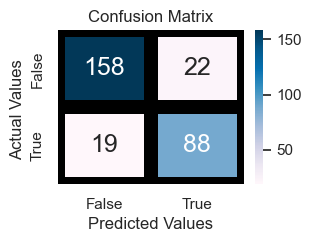

In [91]:
#Confusion Matrix
plt.figure(figsize = (3,2))
cm_dt = confusion_matrix(y_test, y_pred_dt)

#Plotting the confusion matrix
ax = sns.heatmap(cm_dt, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=10, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [92]:
#Evaluation Strategy
TP_dt = cm_dt[1,1]
TN_dt = cm_dt[0,0]
FP_dt = cm_dt[0,1]
FN_dt = cm_dt[1,0]

# 1.  Sensitivity
sensitivity_dt = TP_dt / float(TP_dt + FN_dt)
print("Sensitivity:",sensitivity_dt)

# 2.  Specificity
specificity_dt = TN_dt / float(TN_dt + FP_dt)
print("Specificity:",specificity_dt)

# 3.  Precision
precision_dt = TP_dt / float(TP_dt + FP_dt)
print("Precision:",precision_dt)

# 4.  Accuracy
accuracy_dt = (TP_dt + TN_dt) / float(TP_dt + TN_dt + FN_dt + FP_dt)
print("Accuracy:",accuracy_dt)

Sensitivity: 0.822429906542056
Specificity: 0.8777777777777778
Precision: 0.8
Accuracy: 0.8571428571428571


### Support Vector Machines (SVM)

In [93]:
#Making Support Vector Machines (SVM) Model
svm = SVC(probability=True, kernel = 'linear')
start = time.time()
svm.fit(X_train, y_train)
stop = time.time()
svm_time = f"{stop - start}"

In [94]:
#Making predictions on test data
y_pred_svm = svm.predict(X_test)

#Displaying the predictions
y_pred_svm

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0])

In [95]:
#AUC Score
auc_score_svm = roc_auc_score(y_test, svm.predict(X_test))
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_svm)

AUC Score: 1.0


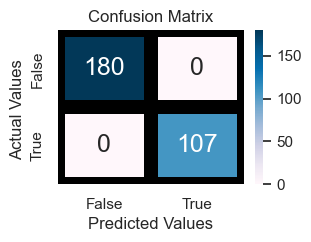

In [97]:
#Confusion Matrix
plt.figure(figsize = (3,2))
cm_svm = confusion_matrix(y_test, y_pred_svm)

#Plotting the confusion matrix
ax = sns.heatmap(cm_svm, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=10, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [98]:
#Evaluation Strategy
TP_svm = cm_svm[1, 1]
TN_svm = cm_svm[0, 0]
FP_svm = cm_svm[0, 1]
FN_svm = cm_svm[1, 0]

# 1.  Sensitivity
sensitivity_svm = TP_svm / float(TP_svm + FN_svm)
print("Sensitivity:",sensitivity_svm)

# 2.  Specificity
specificity_svm = TN_svm / float(TN_svm + FP_svm)
print("Specificity:",specificity_svm)

# 3.  Precision
precision_svm = TP_svm / float(TP_svm + FP_svm)
print("Precision:",precision_svm)

# 4.  Accuracy
accuracy_svm = (TP_svm + TN_svm) / float(TP_svm + TN_svm + FN_svm + FP_svm)
print("Accuracy:",accuracy_svm)

Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Accuracy: 1.0


### ROC Curve

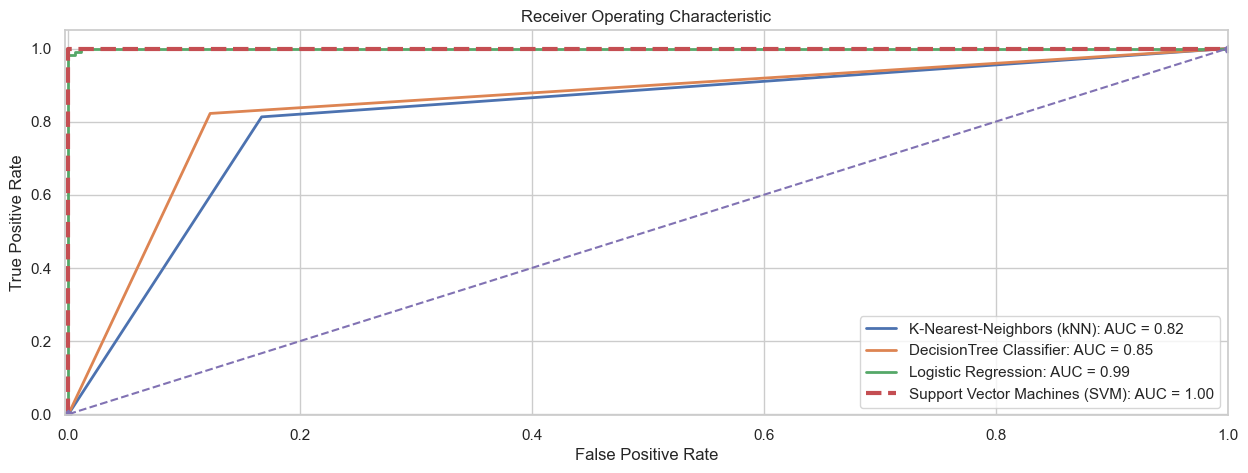

In [116]:
#Plotting the ROC Curve
plt.figure(figsize=(15,5))
plt.plot(fpr_knn, tpr_knn, label='K-Nearest-Neighbors (kNN): AUC = %0.2f' % auc_score_knn, linewidth=2)
plt.plot(fpr_dt, tpr_dt, label='DecisionTree Classifier: AUC = %0.2f' % auc_score_dt, linewidth=2)
plt.plot(fpr_classifier, tpr_classifier, label='Logistic Regression: AUC = %0.2f' % auc_score_classifier, linewidth=2)
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machines (SVM): AUC = %0.2f' % auc_score_svm, linewidth=3, linestyle='dashed')
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([-0.003, 1.0])
plt.ylim([-0.003, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [114]:
#Evaluation Metrics for different models
columns = ['Model', 'Sensitivity', 'Specificity', 'Precision', 'Accuracy', 'Running Time(s)']
evaluation_met = pd.DataFrame(columns=columns)


evaluation_met['Model'] = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'Logistic Regression', 'SVM(linear)']
evaluation_met['Sensitivity'] = [sensitivity_knn, sensitivity_dt, sensitivity_log, sensitivity_svm]
evaluation_met['Specificity'] = [specificity_knn, specificity_dt, specificity_log, specificity_svm]
evaluation_met['Precision'] = [precision_knn, precision_dt, precision_log, precision_svm]
evaluation_met['Accuracy'] = [accuracy_knn, accuracy_dt, accuracy_log, accuracy_svm]
evaluation_met['Running Time(s)'] = [knn_time, dt_time, log_time, svm_time]

evaluation_met


,Model,Sensitivity,Specificity,Precision,Accuracy,Running Time(s)
0,KNeighborsClassifier,0.813084,0.833333,0.743590,0.825784,-0.010042190551757812
1,DecisionTreeClassifier,0.822430,0.877778,0.800000,0.857143,0.020910024642944336
2,Logistic Regression,0.990654,0.994444,0.990654,0.993031,0.08706092834472656
3,SVM(linear),1.000000,1.000000,1.000000,1.000000,0.22647619247436523
